In [1]:
!nvidia-smi

Fri Jun  7 10:47:44 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.59                 Driver Version: 546.59       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce MX330         WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   59C    P8              N/A / ERR! |      0MiB /  2048MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

c:\Users\DELL\OneDrive\Desktop\Python\.venv\Scripts\python-task.ipynb


In [4]:
! pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196  Python-3.9.11 torch-2.3.1+cpu CPU (11th Gen Intel Core(TM) i5-1135G7 2.40GHz)
Setup complete  (8 CPUs, 23.7 GB RAM, 174.0/476.3 GB disk)


In [5]:
from ultralytics import YOLO
from IPython.display import Image, display

In [6]:
%cd ~
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True


C:\Users\DELL


C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\IPython\core\magics\osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]

  0%|          | 0.00/6.23M [00:00<?, ?B/s]
  4%|▍         | 256k/6.23M [00:00<00:03, 1.94MB/s]
 16%|█▌        | 1.00M/6.23M [00:00<00:01, 4.94MB/s]
 26%|██▌       | 1.62M/6.23M [00:00<00:00, 4.98MB/s]
 34%|███▍      | 2.12M/6.23M [00:00<00:01, 4.26MB/s]
 54%|█████▍    | 3.38M/6.23M [00:00<00:00, 6.64MB/s]
 66%|██████▌   | 4.12M/6.23M [00:00<00:00, 6.34MB/s]
100%|██████████| 6.23M/6.23M [00:00<00:00, 7.53MB/s]
Ultralytics YOLOv8.0.196  Python-3.9.11 torch-2.3.1+cpu CPU (11th Gen Intel Core(TM) i5-1135G7 2.40GHz)
YOLOv8n summary (fused): 168 layers, 3151

C:\Users\DELL


C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\IPython\core\magics\osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


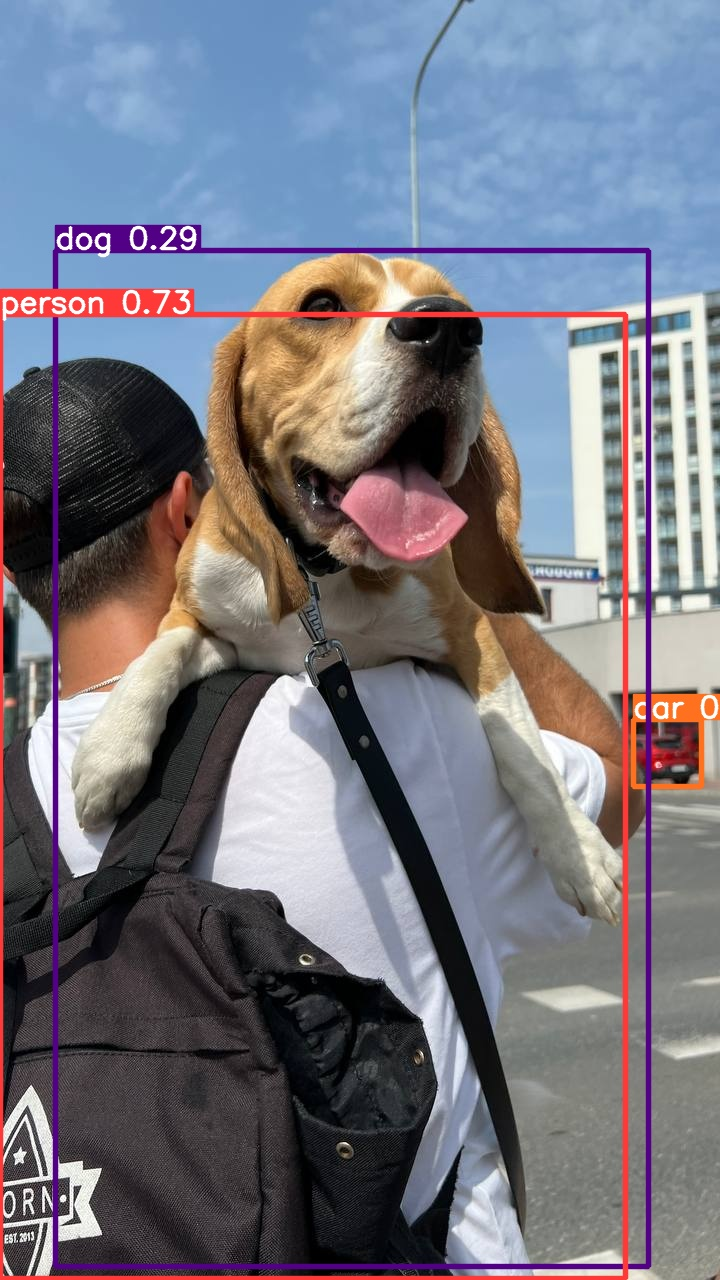

In [10]:
%cd ~
Image(filename='runs/detect/predict/dog.jpeg',height=200)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 C:\Users\DELL\dog.jpeg: 640x384 1 person, 1 car, 1 dog, 135.3ms
Speed: 0.0ms preprocess, 135.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)


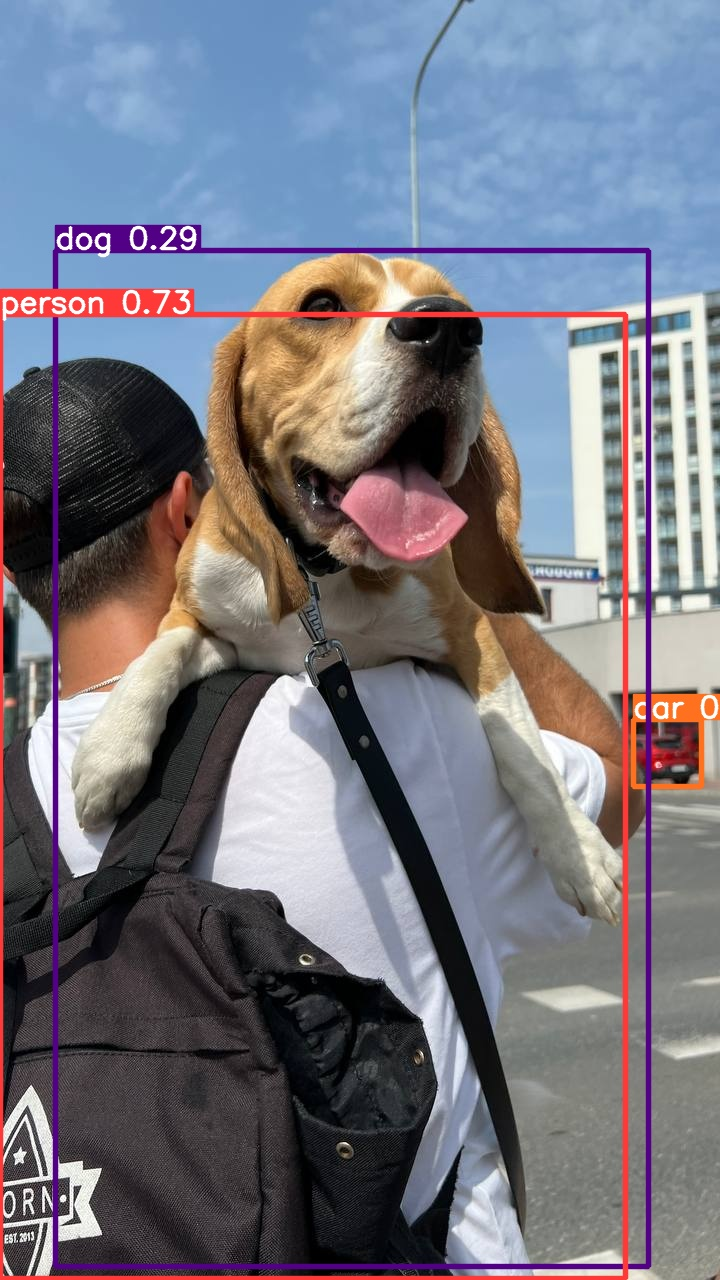

In [12]:
import os
from ultralytics import YOLO
from IPython.display import Image, display
home_dir = os.path.expanduser("~")

# Load the YOLO model
model = YOLO(os.path.join(home_dir, 'yolov8n.pt'))

# Run prediction on the image
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

# Display the saved image with detections
output_image_path = 'runs/detect/predict/dog.jpeg'
display(Image(filename=output_image_path, height=100))

In [13]:
results[0].boxes.xyxy

tensor([[   0.0000,  314.4717,  625.0754, 1278.1946],
        [  55.1731,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0539,  786.0336]])

In [14]:
results[0].boxes.conf

tensor([0.7271, 0.2907, 0.2846])

In [15]:
results[0].boxes.cls

tensor([ 0., 16.,  2.])

## Custom Training

In [20]:
import os
from roboflow import Roboflow

# Install roboflow
! pip install roboflow --quiet

# Change the current working directory
home_dir = os.path.expanduser("~")
dataset_dir = os.path.join(home_dir, "Dataset")
os.makedirs(dataset_dir, exist_ok=True)
os.chdir(dataset_dir)
print("Changed working directory to:", os.getcwd())

# Initialize Roboflow with the API key
rf = Roboflow(api_key="RMEBajg43PKaT4zmuUsW")
project = rf.workspace("objectdetection-qusts").project("object-detection-xdd6a")
version = project.version(1)
dataset = version.download("yolov8")

# Verify the dataset structure
print("Dataset downloaded to:", dataset.location)
print("Directory structure:")
! ls {dataset.location}

# Check the content of data.yaml
data_yaml_path = os.path.join(dataset.location, 'data.yaml')
with open(data_yaml_path, 'r') as file:
    data_yaml_content = file.read()
    print("\nContent of data.yaml:\n", data_yaml_content)

# Update the YOLO command to use the correct dataset path
! pip install ultralytics --quiet  # Ensure YOLOv8 package is installed
! yolo task=detect mode=train model=yolov8s.pt data={data_yaml_path} epochs=25 imgsz=800 plots=True


Changed working directory to: C:\Users\DELL\Dataset
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Object-detection-1 in yolov8:: 100%|██████████| 17/17 [00:00<00:00, 1539.89it/s]

Dataset downloaded to: C:\Users\DELL\Dataset\Object-detection-1
Directory structure:



'ls' is not recognized as an internal or external command,
operable program or batch file.



Content of data.yaml:
 names:
- Football-players
- car
- car-2
- player-2
nc: 4
roboflow:
  license: CC BY 4.0
  project: object-detection-xdd6a
  url: https://universe.roboflow.com/objectdetection-qusts/object-detection-xdd6a/dataset/1
  version: 1
  workspace: objectdetection-qusts
test: test/images
train: train/images
val: valid/images



ERROR: Invalid requirement: '#'

  0%|          | 0.00/21.5M [00:00<?, ?B/s]
  1%|          | 256k/21.5M [00:00<00:11, 1.95MB/s]
  5%|▍         | 1.00M/21.5M [00:00<00:04, 4.60MB/s]
 10%|█         | 2.25M/21.5M [00:00<00:02, 8.04MB/s]
 16%|█▌        | 3.38M/21.5M [00:00<00:02, 9.36MB/s]
 22%|██▏       | 4.75M/21.5M [00:00<00:01, 10.7MB/s]
 30%|██▉       | 6.38M/21.5M [00:00<00:01, 12.0MB/s]
 36%|███▌      | 7.75M/21.5M [00:00<00:01, 12.4MB/s]
 42%|████▏     | 9.00M/21.5M [00:01<00:01, 8.32MB/s]
 49%|████▉     | 10.6M/21.5M [00:01<00:01, 10.1MB/s]
 55%|█████▌    | 11.9M/21.5M [00:01<00:01, 9.48MB/s]
 60%|██████    | 13.0M/21.5M [00:01<00:00, 9.61MB/s]
 66%|██████▌   | 14.1M/21.5M [00:01<00:00, 9.04MB/s]
 71%|███████   | 15.2M/21.5M [00:01<00:00, 9.61MB/s]
 75%|███████▌  | 16.2M/21.5M [00:01<00:00, 9.52MB/s]
 80%|████████  | 17.2M/21.5M [00:02<00:00, 6.88MB/s]
 84%|████████▍ | 18.1M/21.5M [00:02<00:00, 6.47MB/s]
 88%|████████▊ | 18.9M/21.5M [00:02<00:00, 6.13MB/s]
 91%|█████████ | 19.6M/

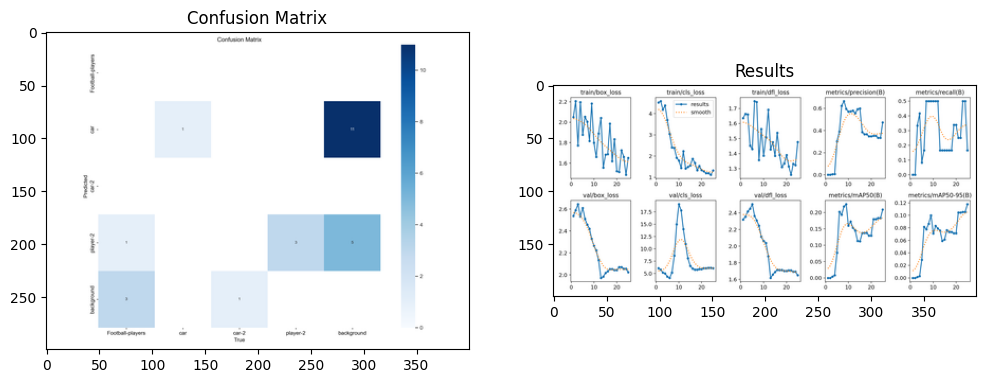

In [35]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define the directory and file paths correctly
home_directory = os.path.expanduser("~")
base_path = os.path.join(home_directory, "Dataset", "runs", "detect", "train")

confusion_matrix_path = os.path.join(base_path, "confusion_matrix.png")
results_path = os.path.join(base_path, "results.png")

# Function to open and resize an image with a different interpolation method
def open_and_resize_image(image_path, desired_width):
    image = Image.open(image_path)
    aspect_ratio = desired_width / float(image.size[0])
    new_height = int((float(image.size[1]) * float(aspect_ratio)))
    resized_image = image.resize((desired_width, new_height), Image.LANCZOS)
    return resized_image

# Open and resize images
desired_width = 400 
confusion_matrix_image = open_and_resize_image(confusion_matrix_path, desired_width)
results_image = open_and_resize_image(results_path, desired_width)

# Display the images using matplotlib
plt.figure(figsize=(12, 7))  

# Display the first image
plt.subplot(1, 2, 1)
plt.imshow(confusion_matrix_image)
plt.title("Confusion Matrix")

# Display the second image
plt.subplot(1, 2, 2)
plt.imshow(results_image)
plt.title("Results")

plt.show()



## Validate Custom Model

In [36]:
%cd C:\Users\DELL\Dataset\runs\detect\train

! yolo task=detect mode=val model=C:\Users\DELL\Dataset\runs\detect\train\weights\best.pt data={dataset.location}\data.yaml


C:\Users\DELL\Dataset\runs\detect\train


using dhist requires you to install the `pickleshare` library.
Ultralytics YOLOv8.0.196  Python-3.9.11 torch-2.3.1+cpu CPU (11th Gen Intel Core(TM) i5-1135G7 2.40GHz)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs

val: Scanning C:\Users\DELL\Dataset\Object-detection-1\valid\labels.cache... 2 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2/2 [00:00<?, ?it/s]
val: Scanning C:\Users\DELL\Dataset\Object-detection-1\valid\labels.cache... 2 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2/2 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]
                   all          2          9    

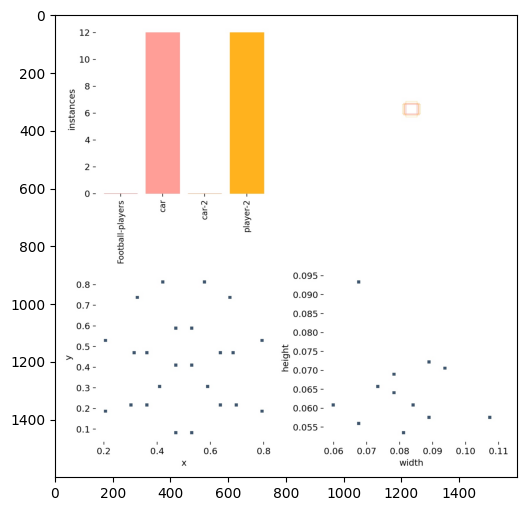

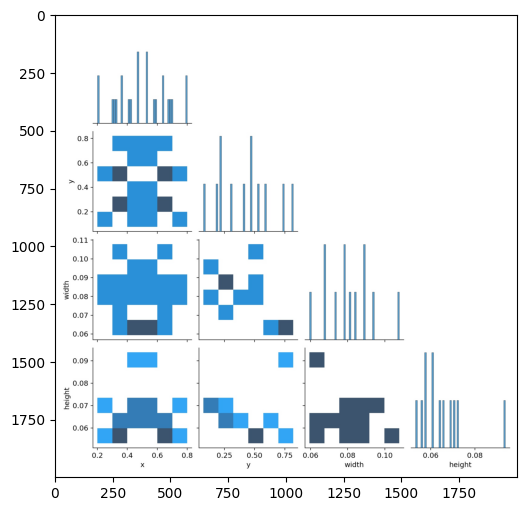

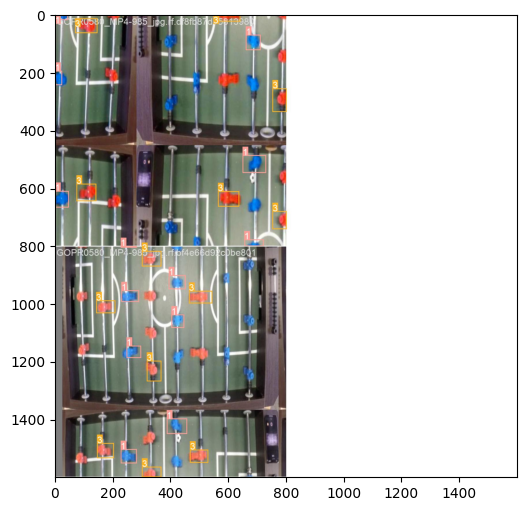

In [52]:
import matplotlib.pyplot as plt
import os

directory_path = "C:/Users/DELL/Dataset/runs/detect/train/"

# Iterate through the images in the directory
for image_path in glob.glob(f"{directory_path}/*.jpg")[:3]: 
    # Load the image
    img = mpimg.imread(image_path)

    # Display the image
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.show()


In [53]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"C:/Users/DELL/Dataset/runs/detect/train/")

An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.
